In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
name_demand_flex_input = [
    "demand_flex0_vre0",
    "demand_flex50_vre0",
    "demand_flex50_vre50",
    "demand_flex50_vre100",
    "demand_flex100_vre0",
    "demand_flex100_vre50",
    "demand_flex100_vre100",
]
cost_scenario = "Low_cost"

Reading  Low_cost/profiles_demand_flex0_vre0.csv
50


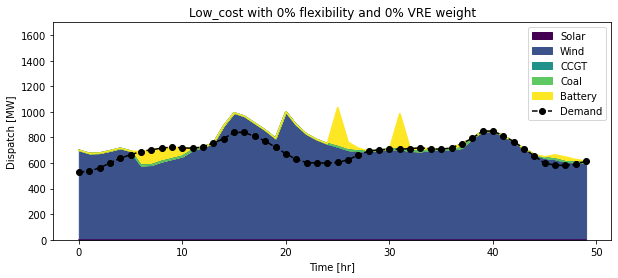

Reading  Low_cost/profiles_demand_flex50_vre0.csv
50


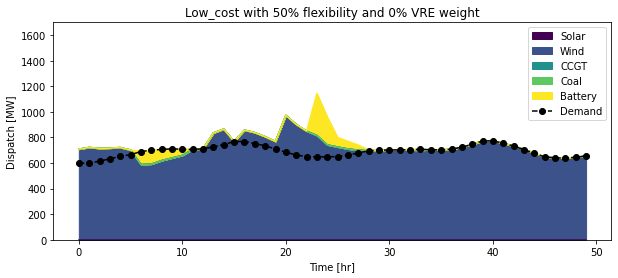

Reading  Low_cost/profiles_demand_flex100_vre0.csv
49


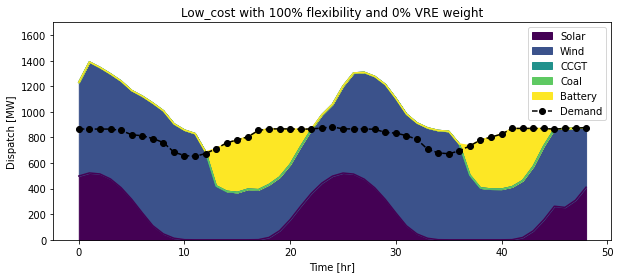

Reading  Low_cost/profiles_demand_flex0_vre50.csv
ERROR
[Errno 2] No such file or directory: 'Low_cost/profiles_demand_flex0_vre50.csv'
Reading  Low_cost/profiles_demand_flex50_vre50.csv
49


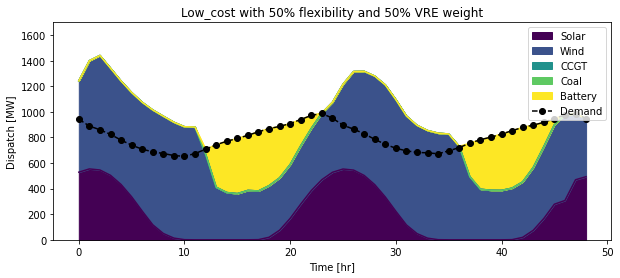

Reading  Low_cost/profiles_demand_flex100_vre50.csv
49


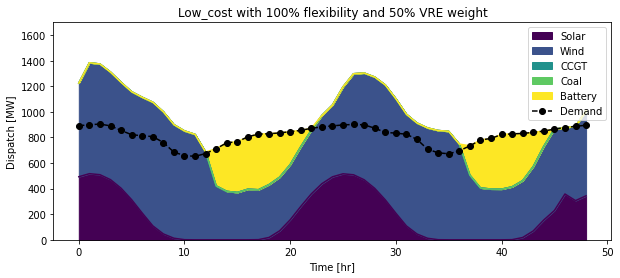

Reading  Low_cost/profiles_demand_flex0_vre100.csv
ERROR
[Errno 2] No such file or directory: 'Low_cost/profiles_demand_flex0_vre100.csv'
Reading  Low_cost/profiles_demand_flex50_vre100.csv
49


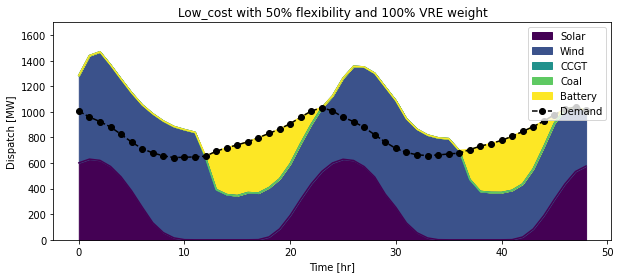

Reading  Low_cost/profiles_demand_flex100_vre100.csv
49


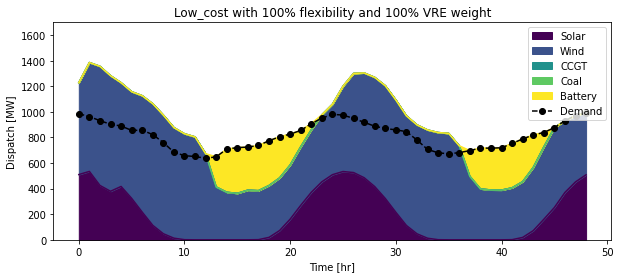

In [19]:
for vre_weight_scenario in [0, 50, 100]:
    for flex_scenario in [0, 50, 100]:
        try:
            fname = f"{cost_scenario}/profiles_demand_flex{flex_scenario}_vre{vre_weight_scenario}.csv"
            print("Reading ", fname)
            df = pd.read_csv(fname)

            df.reset_index(drop=True, inplace=True)

            # Set negative values to zero
            df = df.applymap(lambda x: max(0, x))

            fig, ax = plt.subplots(figsize=(10, 4))

            time = [i for i in range(df.shape[0])]

            df["Time"] = time

            print(len(df))

            # Plot stacked area for the first five columns

            df.plot.area(
                x="Time",
                y=["Solar", "Wind", "CCGT", "Coal", "Battery"],
                ax=ax,
                stacked=True,
                colormap="viridis",
            )

            # Plot Demand as a black dotted line

            df["Demand"].plot(
                x=df.index,
                y="Demand",
                color="black",
                linestyle="--",
                marker="o",
                label="Demand",
            )

            # Customize plot
            ax.set_title(
                f"{cost_scenario} with {flex_scenario}% flexibility and {vre_weight_scenario}% VRE weight"
            )
            ax.set_ylim(top=1700)
            ax.set_xlabel("Time [hr]")

            ax.set_ylabel("Dispatch [MW]")
            ax.legend(loc="upper right")

            plt.show()
        except Exception as e:
            print("ERROR")
            print(e)
            pass

Read  demand_flex0_vre0
Read  demand_flex50_vre0
Read  demand_flex50_vre50
Read  demand_flex50_vre100
Read  demand_flex100_vre0
Read  demand_flex100_vre50
Read  demand_flex100_vre100


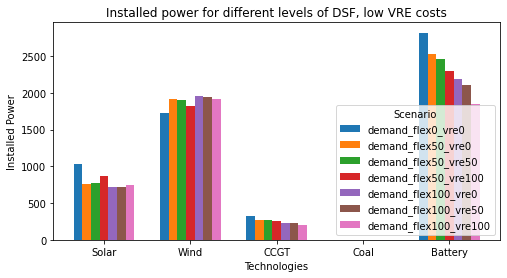

In [4]:
matrix_Power = np.zeros((5, 7))
for i, flex_scenario in enumerate(name_demand_flex_input):
    try:
        df = pd.read_csv(f"{cost_scenario}/power_{flex_scenario}.csv")
        df.reset_index(drop=True, inplace=True)
        matrix_Power[:, i] = df["Installed Power"]
        print("Read ", flex_scenario)
    except Exception as e:
        print(e)
        pass


categories = ["Solar", "Wind", "CCGT", "Coal", "Battery"]
# legend_labels = ["Baseline", "Flex + VRE 0", "Flex + VRE 50", "Flex + VRE 100"]

# Plotting
fig, ax = plt.subplots(figsize=(8, 4))

bar_width = 0.1  # Adjust the width of each bar
# space_between_groups = 0.4  # Adjust the space between groups
bar_positions = np.arange(len(categories))

for i, label in enumerate(name_demand_flex_input):
    bars = ax.bar(
        bar_positions + i * (bar_width), matrix_Power[:, i], bar_width, label=label
    )

# Customize the plot
ax.set_xticks(bar_positions + (len(name_demand_flex_input) - 1) * (bar_width) / 2)
ax.set_xticklabels(categories)
ax.legend(title="Scenario", loc="lower right")
ax.set_xlabel("Technologies")
ax.set_ylabel("Installed Power")
ax.set_title("Installed power for different levels of DSF, low VRE costs")

plt.show()

Read  demand_flex0_vre0
Read  demand_flex100_vre0
Read  demand_flex100_vre50
Read  demand_flex100_vre100


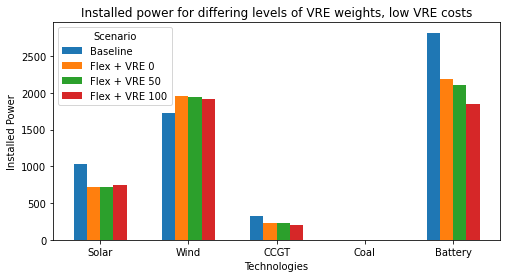

In [5]:
matrix_Power = np.zeros((5, 5))

flex_vre_sweep = [
    "demand_flex0_vre0",
    "demand_flex100_vre0",
    "demand_flex100_vre50",
    "demand_flex100_vre100",
]
for i, flex_scenario in enumerate(flex_vre_sweep):
    try:
        df = pd.read_csv(f"{cost_scenario}/power_{flex_scenario}.csv")
        df.reset_index(drop=True, inplace=True)
        matrix_Power[:, i] = df["Installed Power"]
        print("Read ", flex_scenario)
    except Exception as e:
        print(e)
        pass


categories = ["Solar", "Wind", "CCGT", "Coal", "Battery"]
legend_labels = ["Baseline", "Flex + VRE 0", "Flex + VRE 50", "Flex + VRE 100"]

# Plotting
fig, ax = plt.subplots(figsize=(8, 4))

bar_width = 0.15  # Adjust the width of each bar
# space_between_groups = 0.4  # Adjust the space between groups
bar_positions = np.arange(len(categories))

for i, label in enumerate(legend_labels):
    bars = ax.bar(
        bar_positions + i * (bar_width), matrix_Power[:, i], bar_width, label=label
    )

# Customize the plot
ax.set_xticks(bar_positions + (len(legend_labels) - 1) * (bar_width) / 2)
ax.set_xticklabels(categories)
ax.legend(title="Scenario")
ax.set_xlabel("Technologies")
ax.set_ylabel("Installed Power")
ax.set_title("Installed power for differing levels of VRE weights, low VRE costs")

plt.show()

Read  demand_flex0_vre0
Read  demand_flex50_vre0
Read  demand_flex100_vre0


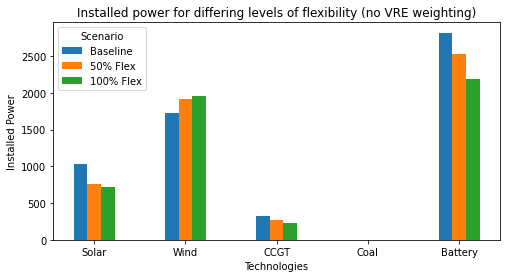

In [6]:
matrix_Power = np.zeros((5, 3))

flex_sweep = [
    "demand_flex0_vre0",
    "demand_flex50_vre0",
    "demand_flex100_vre0",
]
for i, flex_scenario in enumerate(flex_sweep):
    try:
        df = pd.read_csv(f"{cost_scenario}/power_{flex_scenario}.csv")
        df.reset_index(drop=True, inplace=True)
        matrix_Power[:, i] = df["Installed Power"]
        print("Read ", flex_scenario)
    except Exception as e:
        print(e)
        pass


categories = ["Solar", "Wind", "CCGT", "Coal", "Battery"]
legend_labels = ["Baseline", "50% Flex", "100% Flex"]

# Plotting
fig, ax = plt.subplots(figsize=(8, 4))

bar_width = 0.15  # Adjust the width of each bar
# space_between_groups = 0.4  # Adjust the space between groups
bar_positions = np.arange(len(categories))

for i, label in enumerate(legend_labels):
    bars = ax.bar(
        bar_positions + i * (bar_width), matrix_Power[:, i], bar_width, label=label
    )

# Customize the plot
ax.set_xticks(bar_positions + (len(legend_labels) - 1) * (bar_width) / 2)
ax.set_xticklabels(categories)
ax.legend(title="Scenario")
ax.set_xlabel("Technologies")
ax.set_ylabel("Installed Power")
ax.set_title("Installed power for differing levels of flexibility (no VRE weighting)")

plt.show()

Read  demand_flex0_vre0
Read  demand_flex50_vre100
Read  demand_flex100_vre100


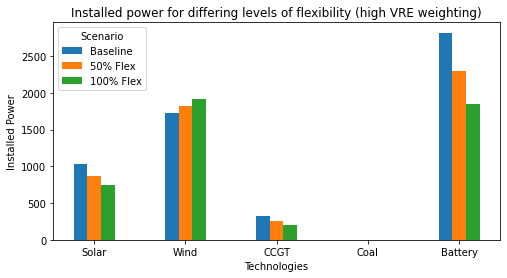

In [7]:
matrix_Power = np.zeros((5, 3))

flex_sweep = [
    "demand_flex0_vre0",
    "demand_flex50_vre100",
    "demand_flex100_vre100",
]
for i, flex_scenario in enumerate(flex_sweep):
    try:
        df = pd.read_csv(f"{cost_scenario}/power_{flex_scenario}.csv")
        df.reset_index(drop=True, inplace=True)
        matrix_Power[:, i] = df["Installed Power"]
        print("Read ", flex_scenario)
    except Exception as e:
        print(e)
        pass


categories = ["Solar", "Wind", "CCGT", "Coal", "Battery"]
legend_labels = ["Baseline", "50% Flex", "100% Flex"]

# Plotting
fig, ax = plt.subplots(figsize=(8, 4))

bar_width = 0.15  # Adjust the width of each bar
# space_between_groups = 0.4  # Adjust the space between groups
bar_positions = np.arange(len(categories))

for i, label in enumerate(legend_labels):
    bars = ax.bar(
        bar_positions + i * (bar_width), matrix_Power[:, i], bar_width, label=label
    )

# Customize the plot
ax.set_xticks(bar_positions + (len(legend_labels) - 1) * (bar_width) / 2)
ax.set_xticklabels(categories)
ax.legend(title="Scenario")
ax.set_xlabel("Technologies")
ax.set_ylabel("Installed Power")
ax.set_title("Installed power for differing levels of flexibility (high VRE weighting)")

plt.show()